## Universal dependencies en **Kakataibo!**

In [1]:
#!pip install conllu

## Leemos todos los archivos conllu de la carpeta archivos-conllu

In [2]:
import glob as glob

conllu_archivos = glob.glob('archivos-conllu/*.conllu')

In [3]:
conllu_archivos

['archivos-conllu\\ud-claudia-1.conllu',
 'archivos-conllu\\ud-claudia-2.conllu',
 'archivos-conllu\\ud-claudia-3.conllu',
 'archivos-conllu\\ud-luisa-s370.conllu',
 'archivos-conllu\\ud-luisa-s445.conllu',
 'archivos-conllu\\ud-luisa-s476.conllu',
 'archivos-conllu\\ud-mariana-333.conllu',
 'archivos-conllu\\ud-mariana-335.conllu',
 'archivos-conllu\\ud-mariana-460.conllu',
 'archivos-conllu\\ud-rosa-1.conllu',
 'archivos-conllu\\ud-rosa-2.conllu',
 'archivos-conllu\\ud-rosa-3.conllu',
 'archivos-conllu\\ud-sabina-1.conllu',
 'archivos-conllu\\ud-sabina-2.conllu',
 'archivos-conllu\\ud-sabina-3.conllu']

In [4]:
'archivos-conllu\\ud-claudia-1.conllu'.split('\\')[1]

'ud-claudia-1.conllu'

In [5]:
A = [1,2,3,4,5]

In [6]:
a = 0

for i in range(10):
    try:
        a+=A[i]
    except IndexError:
        print(str(i)+' este indice no pertenece a la lista :(')
        pass

5 este indice no pertenece a la lista :(
6 este indice no pertenece a la lista :(
7 este indice no pertenece a la lista :(
8 este indice no pertenece a la lista :(
9 este indice no pertenece a la lista :(


In [7]:
sum(A)

15

In [8]:
kakataibo = []

In [9]:
from conllu import parse

for file in conllu_archivos:
    try:
        data_k = open('archivos-conllu/'+file.split('\\')[1] , "r", encoding="utf-8")
        data_k = data_k.read()
        kakataibo += parse(data_k)
    except Exception as inst:
        print(file)
        pass

In [10]:
len(kakataibo)

15

In [11]:
## lista de objetos TokenList

kakataibo

[TokenList<Xanu,  =n, ka, =is, =a, buankian, ain, bënë, “, unirá, ka, ”, .>,
 TokenList<“, Min, bënë, ‘atankëxun, ka, ‘ëribi, min, maëxratsukun, ‘ë, ‘a, ”, ka, =is, =a, kakëshín, .>,
 TokenList<“, Anun, ma, shi, ki, nun, ka, ‘ë, nanë, itsirá, ‘ë, nipáxun, ”, ka, =is, =a, kakëshín, .>,
 TokenList<Hotel, =uki, ka, =a, ‘ë, =n, xukën, u-i-a, .>,
 TokenList<‘Ë, =x, ka, =na, rakwët-i-n, ‘inu, =n, pi-ti, rabanan, .>,
 TokenList<Bëru-ax, ka, =is, =a, bëru-an, ka, =is, =a, ukairi, a, tënka-pat-akë-x-ín, u-but-kin, is, =a, rët-uku-but-an, .>,
 TokenList<atian, casi, kamabi, nëtë, =n, ka, =is, =a, a, uni, kwan-akë-x-ín, .>,
 TokenList<ka, =nanuna, toxama, upí, bits-tankëxun, taish, a, bits-tankëxun, ka, =nanuna, ‘aru-i-n, .>,
 TokenList<paën-xun, ka, =na, ‘ë, =n, ‘atsa, kwëën-i-n, .>,
 TokenList<Ë, =nu, achushi, bëráma, nu, =n, ‘anibu, ‘ia, ka, =na, ñuikasin, .>,
 TokenList<Tanu, rërëkanux, tsóbuakëxa, bai, ‘ipasu, .>,
 TokenList<Roberto, =nën, ka, =a, ënë, ‘ó, name, pipania, .>

## Ejercicios con el corpus :)

Para una **oración**, identifique todos los **tokens** y los **types**. 

In [12]:
## función que calcula la frecuencia de types para una oración

## INPUT: lista de diccionarios
## OUTPUT: diccionario type:frecuencia del type
def frecuencia_types(sent):
    
    ## tokens
    puntuacion = ['.',',']
    tokens = []
    for d in sent:
        form = d['form']
        if form not in puntuacion:
            tokens+=[form.lower()]
            
    ## types
    types = []
    for palabra in tokens:
        if palabra not in types:
            types+=[palabra]
            
    D_type_frec = {}
    
    ## diccionario de frecuencia, con ceros al principio
    for word_type in types:
        D_type_frec[word_type]=0
    ## recorremos la lista tokens buscando los types, y cuando aparecen sumamos 1
    for token in tokens:
        D_type_frec[token]+=1
        
    return D_type_frec

In [13]:
frecuencia_types(kakataibo[6])

{'atian': 1,
 'casi': 1,
 'kamabi': 1,
 'nëtë': 1,
 '=n': 1,
 'ka': 1,
 '=is': 1,
 '=a': 1,
 'a': 1,
 'uni': 1,
 'kwan-akë-x-ín': 1}

In [14]:
from collections import Counter

## función que usa la librería collections

## INPUT: lista de diccionarios
## OUTPUT: diccionario type:frecuencia del type
def frecuencia_types_counter(sent):
    
    ## tokens
    puntuacion = ['.',',']
    tokens = []
    for d in sent:
        form = d['form']
        if form not in puntuacion:
            tokens+=[form.lower()]
            
    D_type_frec = dict(Counter(tokens))
        
    return D_type_frec

In [15]:
frecuencia_types_counter(kakataibo[12])

{'emilio': 1,
 'ka': 1,
 '=a': 1,
 'mas': 1,
 'xuá': 1,
 'ki': 1,
 'roberto': 1,
 '=ma': 1,
 '‘ikën': 1}

In [16]:
## INPUT: lista de diccionarios
## INPUT: entero k -> número de types más frecuentes
## OUTPUT: diccionario type:frecuencia del type
def types_mas_frecuentes(sent,k):
    
    ## tokens
    puntuacion = ['.',',']
    tokens = []
    for d in sent:
        form = d['form']
        if form not in puntuacion:
            tokens+=[form.lower()]
            
    D_type_frec = Counter(tokens)
        
    return D_type_frec.most_common(k)

In [17]:
types_mas_frecuentes(kakataibo[0],4)

[('ka', 2), ('xanu', 1), (' =n', 1), ('=is', 1)]

In [18]:
## ¿Cómo podemos generalizar esto para todo el mini-corpus?

lista_diccionarios_corpus = []

for sentence in kakataibo:
    for d in sentence:
        lista_diccionarios_corpus+=[d]

In [19]:
dict_frec_types = frecuencia_types(lista_diccionarios_corpus)

In [20]:
dict_frec_types

{'xanu': 1,
 ' =n': 1,
 'ka': 18,
 '=is': 6,
 '=a': 11,
 'buankian': 1,
 'ain': 1,
 'bënë': 2,
 '“': 3,
 'unirá': 1,
 '”': 3,
 'min': 2,
 '‘atankëxun': 1,
 '‘ëribi': 1,
 'maëxratsukun': 1,
 '‘ë': 3,
 '‘a': 1,
 'kakëshín': 2,
 'anun': 1,
 'ma': 1,
 'shi': 1,
 'ki': 2,
 'nun': 1,
 'nanë': 1,
 'itsirá': 1,
 'nipáxun': 1,
 'hotel': 1,
 '=uki': 1,
 '‘ë': 3,
 '=n': 5,
 'xukën': 1,
 'u-i-a': 1,
 '=x': 1,
 '=na': 3,
 'rakwët-i-n': 1,
 '‘inu': 1,
 'pi-ti': 1,
 'rabanan': 1,
 'bëru-ax': 1,
 'bëru-an': 1,
 'ukairi': 1,
 'a': 3,
 'tënka-pat-akë-x-ín': 1,
 'u-but-kin': 1,
 'is': 1,
 'rët-uku-but-an': 1,
 'atian': 1,
 'casi': 1,
 'kamabi': 1,
 'nëtë': 1,
 'uni': 3,
 'kwan-akë-x-ín': 1,
 '=nanuna': 2,
 'toxama': 1,
 'upí': 1,
 'bits-tankëxun': 2,
 'taish': 1,
 '‘aru-i-n': 1,
 'paën-xun': 1,
 '‘atsa': 1,
 'kwëën-i-n': 1,
 'ë': 1,
 '=nu': 1,
 'achushi': 1,
 'bëráma': 1,
 'nu': 1,
 '‘anibu': 1,
 '‘ia': 1,
 'ñuikasin': 1,
 'tanu': 1,
 'rërëkanux': 1,
 'tsóbuakëxa': 1,
 'bai': 1,
 '‘ipasu': 1,

In [21]:
num_types = len(dict_frec_types)

In [22]:
num_types

94

In [23]:
num_tokens = sum(dict_frec_types.values())

In [24]:
num_tokens

151

In [25]:
types_frec = types_mas_frecuentes(lista_diccionarios_corpus,len(lista_diccionarios_corpus))

In [26]:
types_frec

[('ka', 18),
 ('=a', 11),
 ('=is', 6),
 ('=n', 5),
 ('“', 3),
 ('”', 3),
 ('‘ë', 3),
 ('‘ë', 3),
 ('=na', 3),
 ('a', 3),
 ('uni', 3),
 ('bënë', 2),
 ('min', 2),
 ('kakëshín', 2),
 ('ki', 2),
 ('=nanuna', 2),
 ('bits-tankëxun', 2),
 ('roberto', 2),
 ('xanu', 1),
 (' =n', 1),
 ('buankian', 1),
 ('ain', 1),
 ('unirá', 1),
 ('‘atankëxun', 1),
 ('‘ëribi', 1),
 ('maëxratsukun', 1),
 ('‘a', 1),
 ('anun', 1),
 ('ma', 1),
 ('shi', 1),
 ('nun', 1),
 ('nanë', 1),
 ('itsirá', 1),
 ('nipáxun', 1),
 ('hotel', 1),
 ('=uki', 1),
 ('xukën', 1),
 ('u-i-a', 1),
 ('=x', 1),
 ('rakwët-i-n', 1),
 ('‘inu', 1),
 ('pi-ti', 1),
 ('rabanan', 1),
 ('bëru-ax', 1),
 ('bëru-an', 1),
 ('ukairi', 1),
 ('tënka-pat-akë-x-ín', 1),
 ('u-but-kin', 1),
 ('is', 1),
 ('rët-uku-but-an', 1),
 ('atian', 1),
 ('casi', 1),
 ('kamabi', 1),
 ('nëtë', 1),
 ('kwan-akë-x-ín', 1),
 ('toxama', 1),
 ('upí', 1),
 ('taish', 1),
 ('‘aru-i-n', 1),
 ('paën-xun', 1),
 ('‘atsa', 1),
 ('kwëën-i-n', 1),
 ('ë', 1),
 ('=nu', 1),
 ('achus

In [27]:
X = list(range(len(types_frec)))
Y = []

for item in types_frec:
    Y += [item[1]]

In [28]:
import matplotlib.pyplot as plt

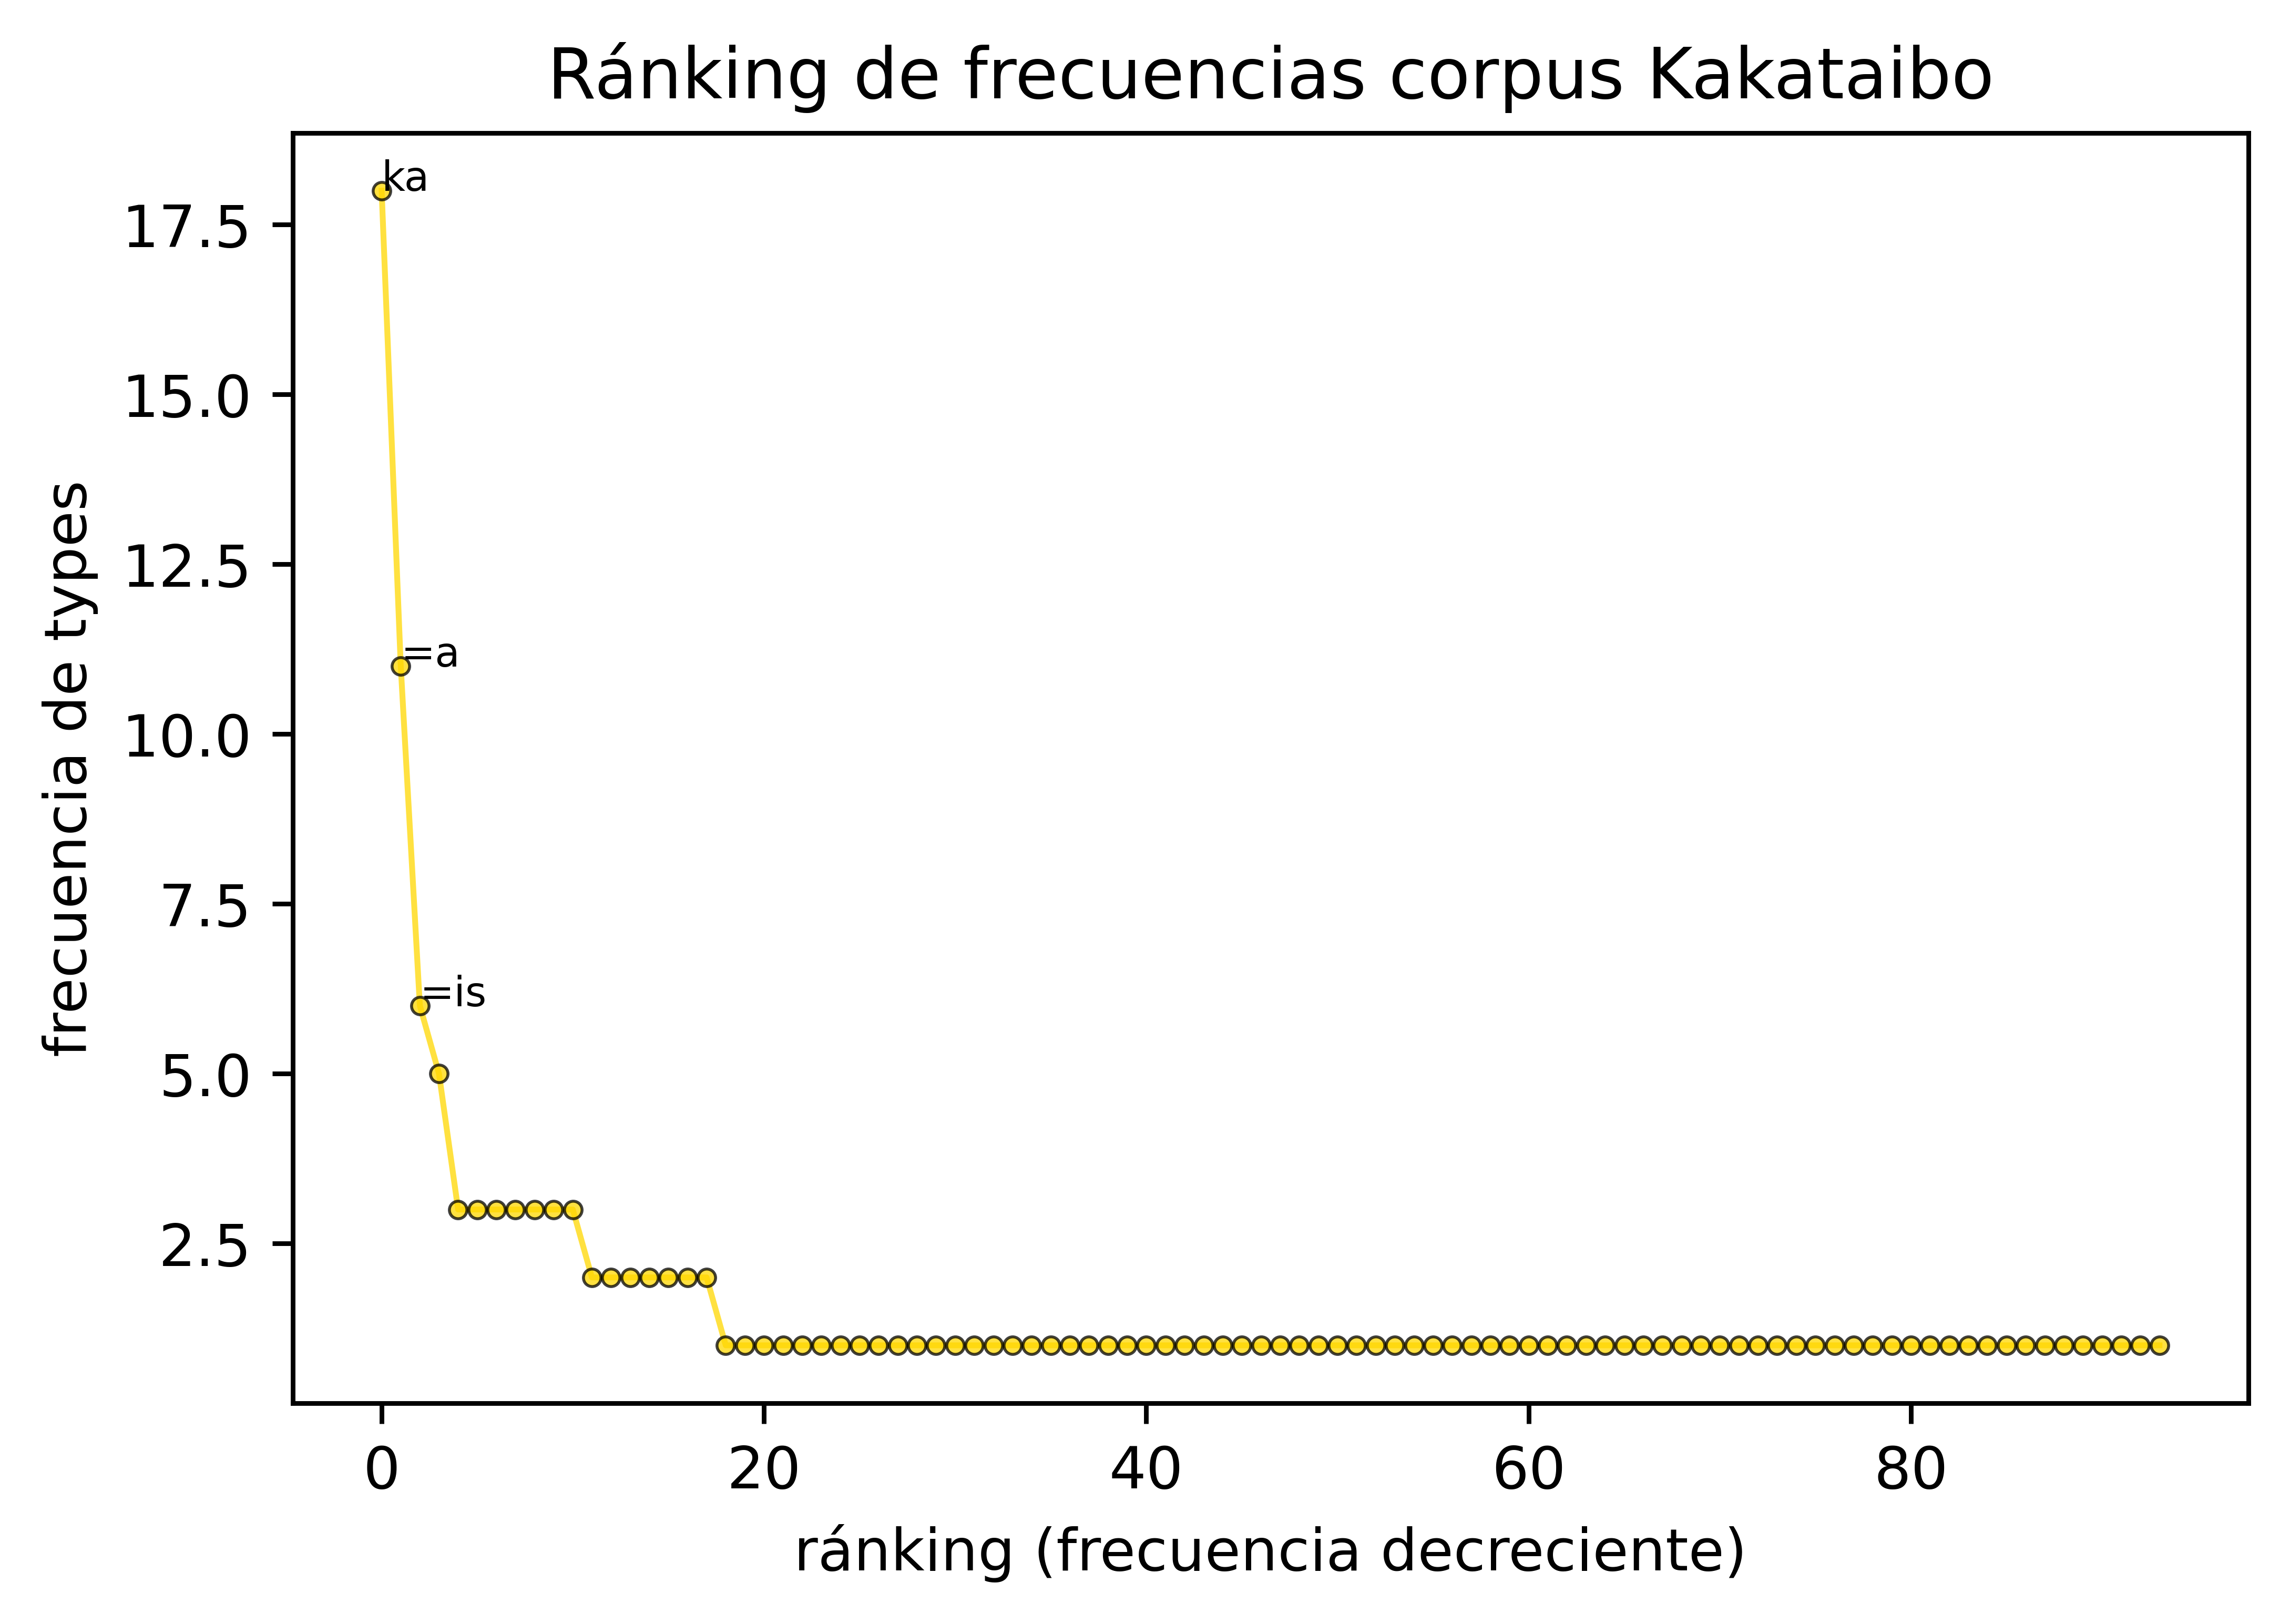

In [29]:
fig, ax = plt.subplots(dpi=800)

plt.title('Ránking de frecuencias corpus Kakataibo',fontsize=12)

ax.plot(X,Y,marker='o',color='gold',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full')

for i in range(3):
    ax.annotate(types_frec[i][0], (X[i], Y[i]), fontsize=7)
    
#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.xlabel(r'ránking (frecuencia decreciente)',fontsize=10)
plt.ylabel(r'frecuencia de types',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('K.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

Calcule para cada type la cantidad $-\log (p_t)$, donde $p_t$ es la frecuencia normalizada del type $t$ ¿Qué puede observar?

In [30]:
dict_probabilidades = {}

for key in dict_frec_types:
    dict_probabilidades[key]=dict_frec_types[key]/num_tokens

In [31]:
import math

In [32]:
dict_sorpresa = {}

for key in dict_frec_types:
    dict_sorpresa[key]=-math.log(dict_probabilidades[key])

In [33]:
types = [item[0] for item in types_frec]

In [34]:
entropia_kakataibo = 0

for key in types:
    entropia_kakataibo += dict_probabilidades[key]*dict_sorpresa[key]

In [35]:
X = []
Y = []

for key in types:
    X += [dict_probabilidades[key]]
    Y += [dict_sorpresa[key]]
    print(key,dict_frec_types[key],dict_probabilidades[key],dict_sorpresa[key])

ka 18 0.11920529801324503 2.1269080789187598
=a 11 0.0728476821192053 2.6193845640165536
=is 6 0.039735099337748346 3.2255203675868693
=n 5 0.033112582781456956 3.407841924380824
“ 3 0.019867549668874173 3.9186675481468147
” 3 0.019867549668874173 3.9186675481468147
‘ë 3 0.019867549668874173 3.9186675481468147
‘ë 3 0.019867549668874173 3.9186675481468147
=na 3 0.019867549668874173 3.9186675481468147
a 3 0.019867549668874173 3.9186675481468147
uni 3 0.019867549668874173 3.9186675481468147
bënë 2 0.013245033112582781 4.324132656254979
min 2 0.013245033112582781 4.324132656254979
kakëshín 2 0.013245033112582781 4.324132656254979
ki 2 0.013245033112582781 4.324132656254979
=nanuna 2 0.013245033112582781 4.324132656254979
bits-tankëxun 2 0.013245033112582781 4.324132656254979
roberto 2 0.013245033112582781 4.324132656254979
xanu 1 0.006622516556291391 5.017279836814924
 =n 1 0.006622516556291391 5.017279836814924
buankian 1 0.006622516556291391 5.017279836814924
ain 1 0.006622516556291

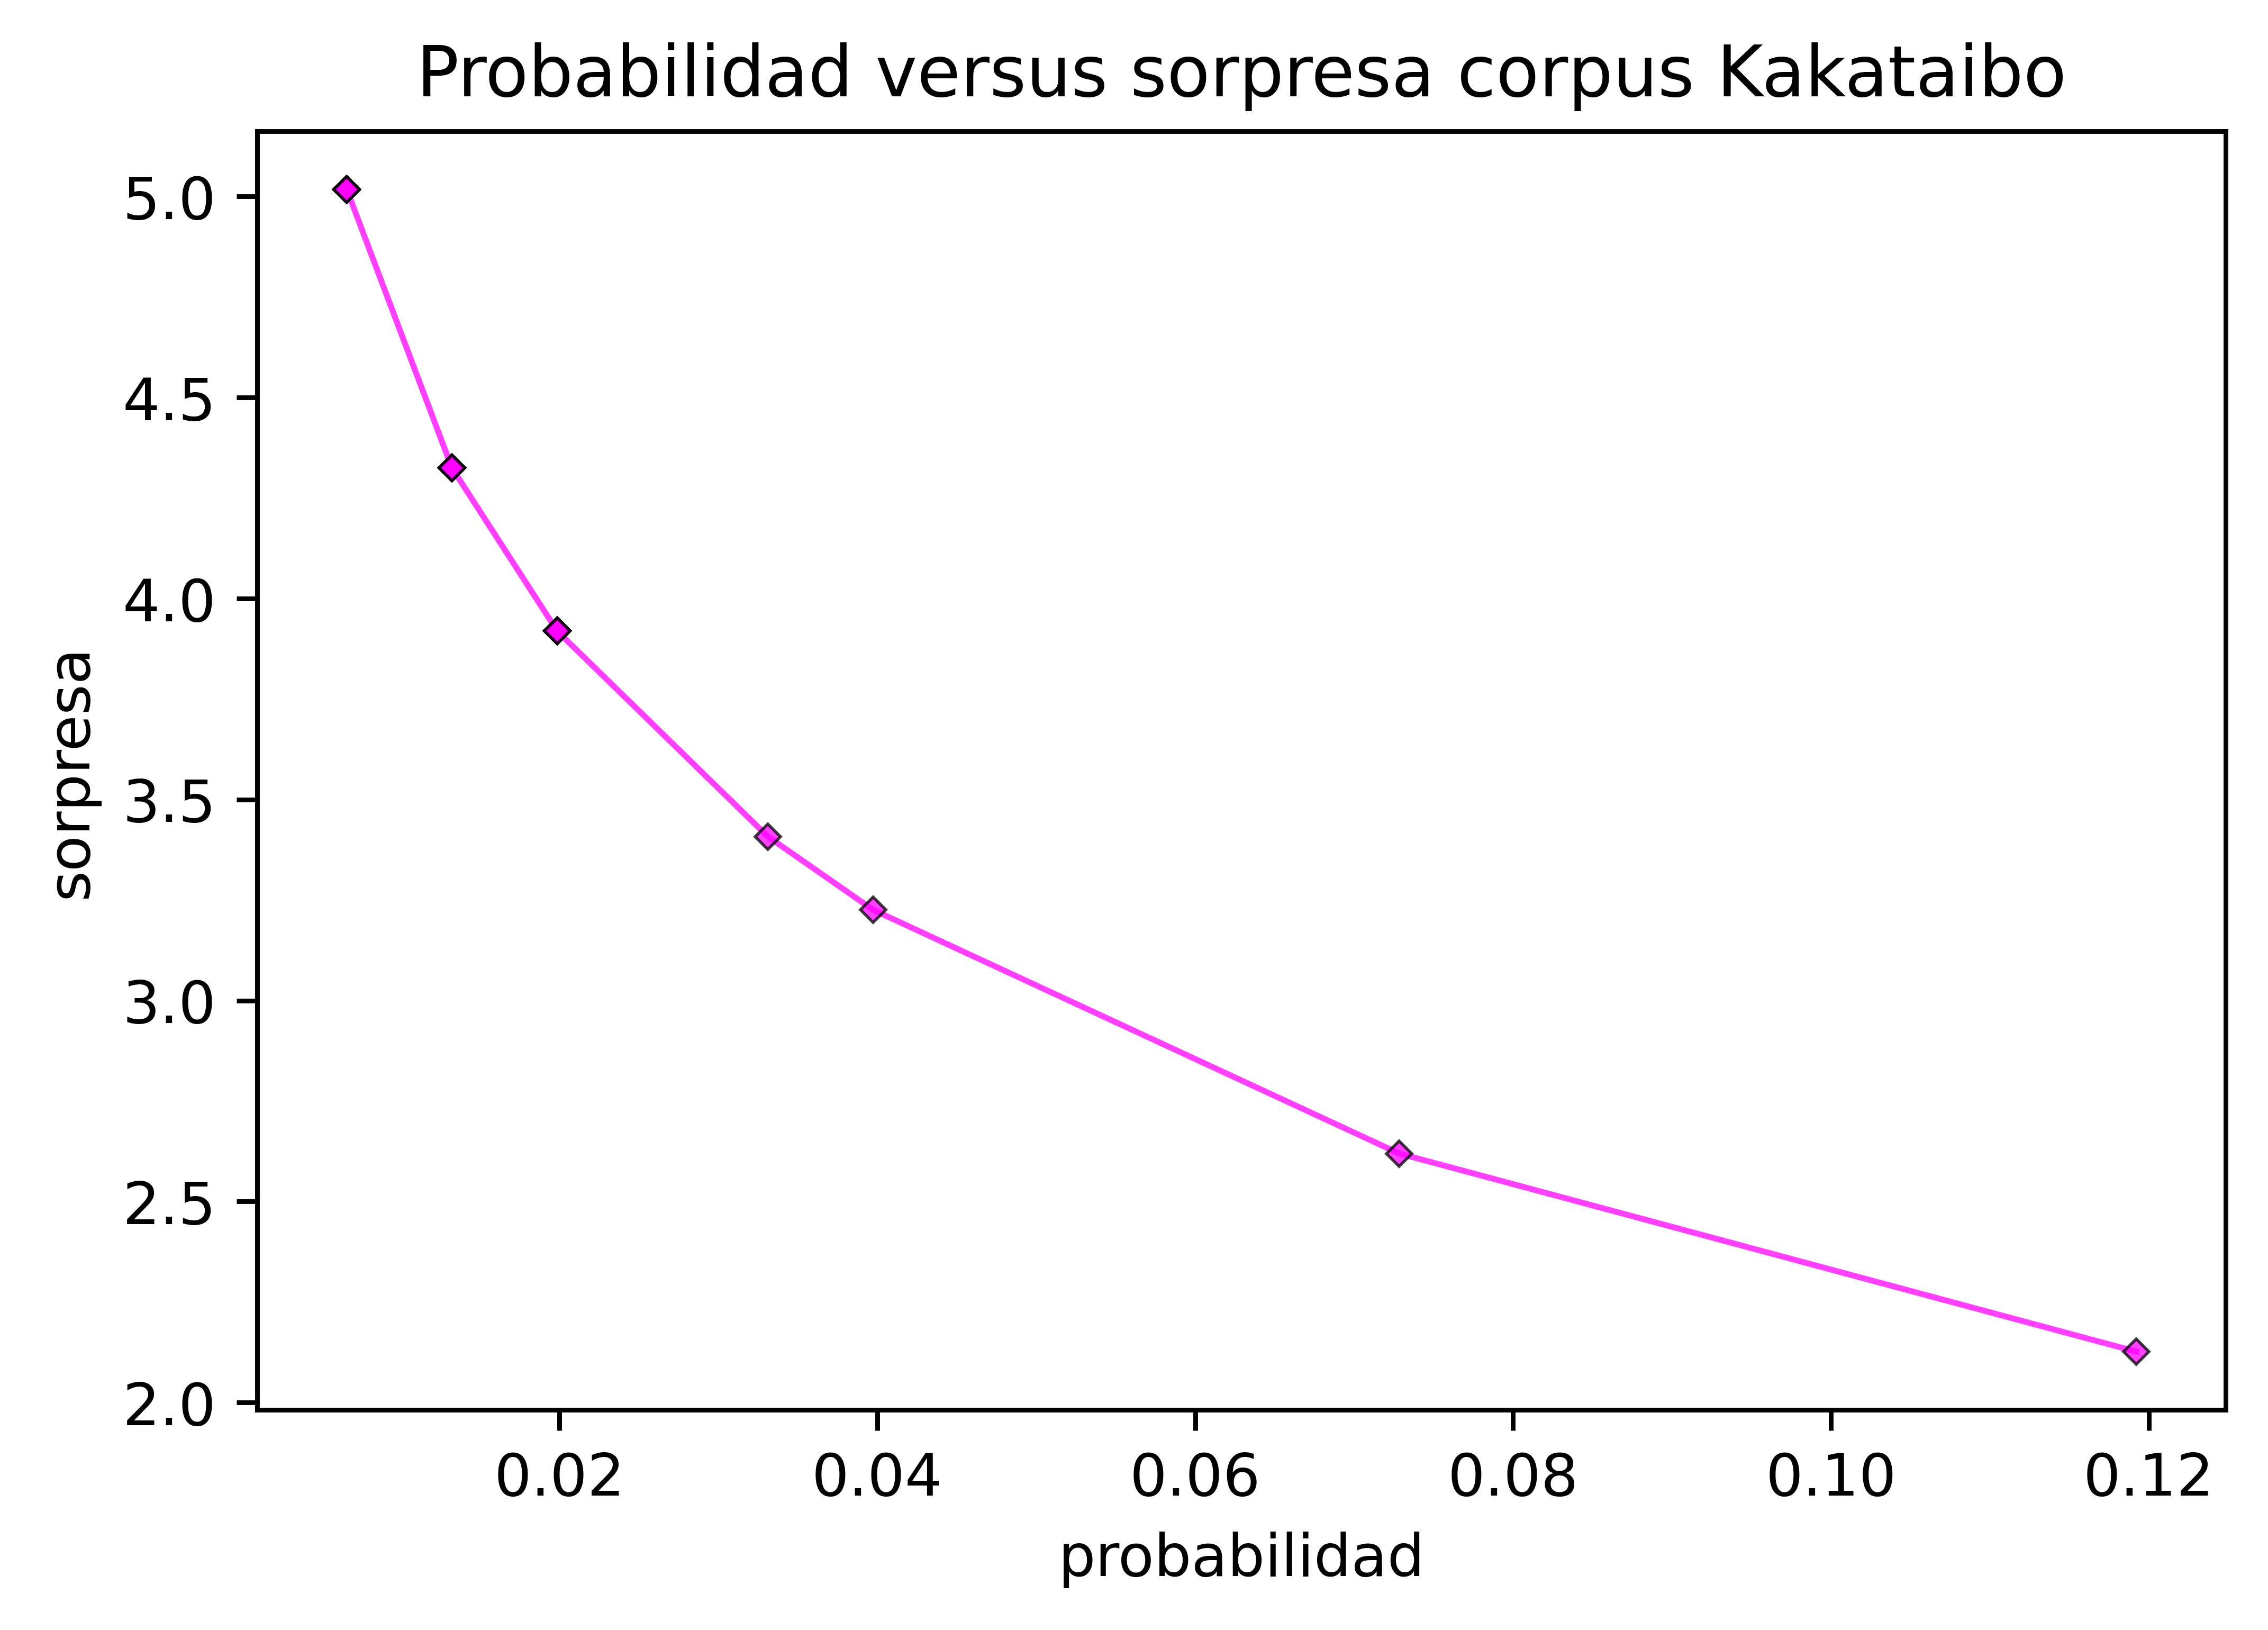

In [36]:
fig, ax = plt.subplots(dpi=800)

plt.title('Probabilidad versus sorpresa corpus Kakataibo',fontsize=12)

ax.plot(X,Y,marker='D',color='fuchsia',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full')
    
#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.xlabel(r'probabilidad',fontsize=10)
plt.ylabel(r'sorpresa',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('PvsS.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [37]:
entropia_kakataibo

4.156510269859163

Construya un **diccionario {frecuencia:lista de types con esa frecuencia}** para cada frecuencia del corpus.

In [38]:
len(dict_frec_types)

94

In [39]:
sum(dict_frec_types.values())

151

In [40]:
frecuencias = list(set(dict_frec_types.values()))

In [41]:
frecuencias

[1, 2, 3, 5, 6, 11, 18]

In [42]:
D_frecuencias_lista = {}

for f in frecuencias:
    D_frecuencias_lista[f]=[]

In [43]:
for palabra in dict_frec_types.keys():
    frec = dict_frec_types[palabra]
    D_frecuencias_lista[frec]+=[palabra]

In [44]:
D_frecuencias_lista[3]

['“', '”', '‘ë', '‘ë', '=na', 'a', 'uni']

Construya un **diccionario {frecuencia:número de veces que aparece esa frecuencia}** para cada frecuencia del corpus.

In [45]:
D_frec_numero = {}

for key in D_frecuencias_lista.keys():
    D_frec_numero[key]=len(D_frecuencias_lista[key])

In [46]:
D_frec_numero

{1: 76, 2: 7, 3: 7, 5: 1, 6: 1, 11: 1, 18: 1}

In [47]:
X = list(D_frec_numero.keys())
Y = list(D_frec_numero.values())

In [48]:
sum(X)

46

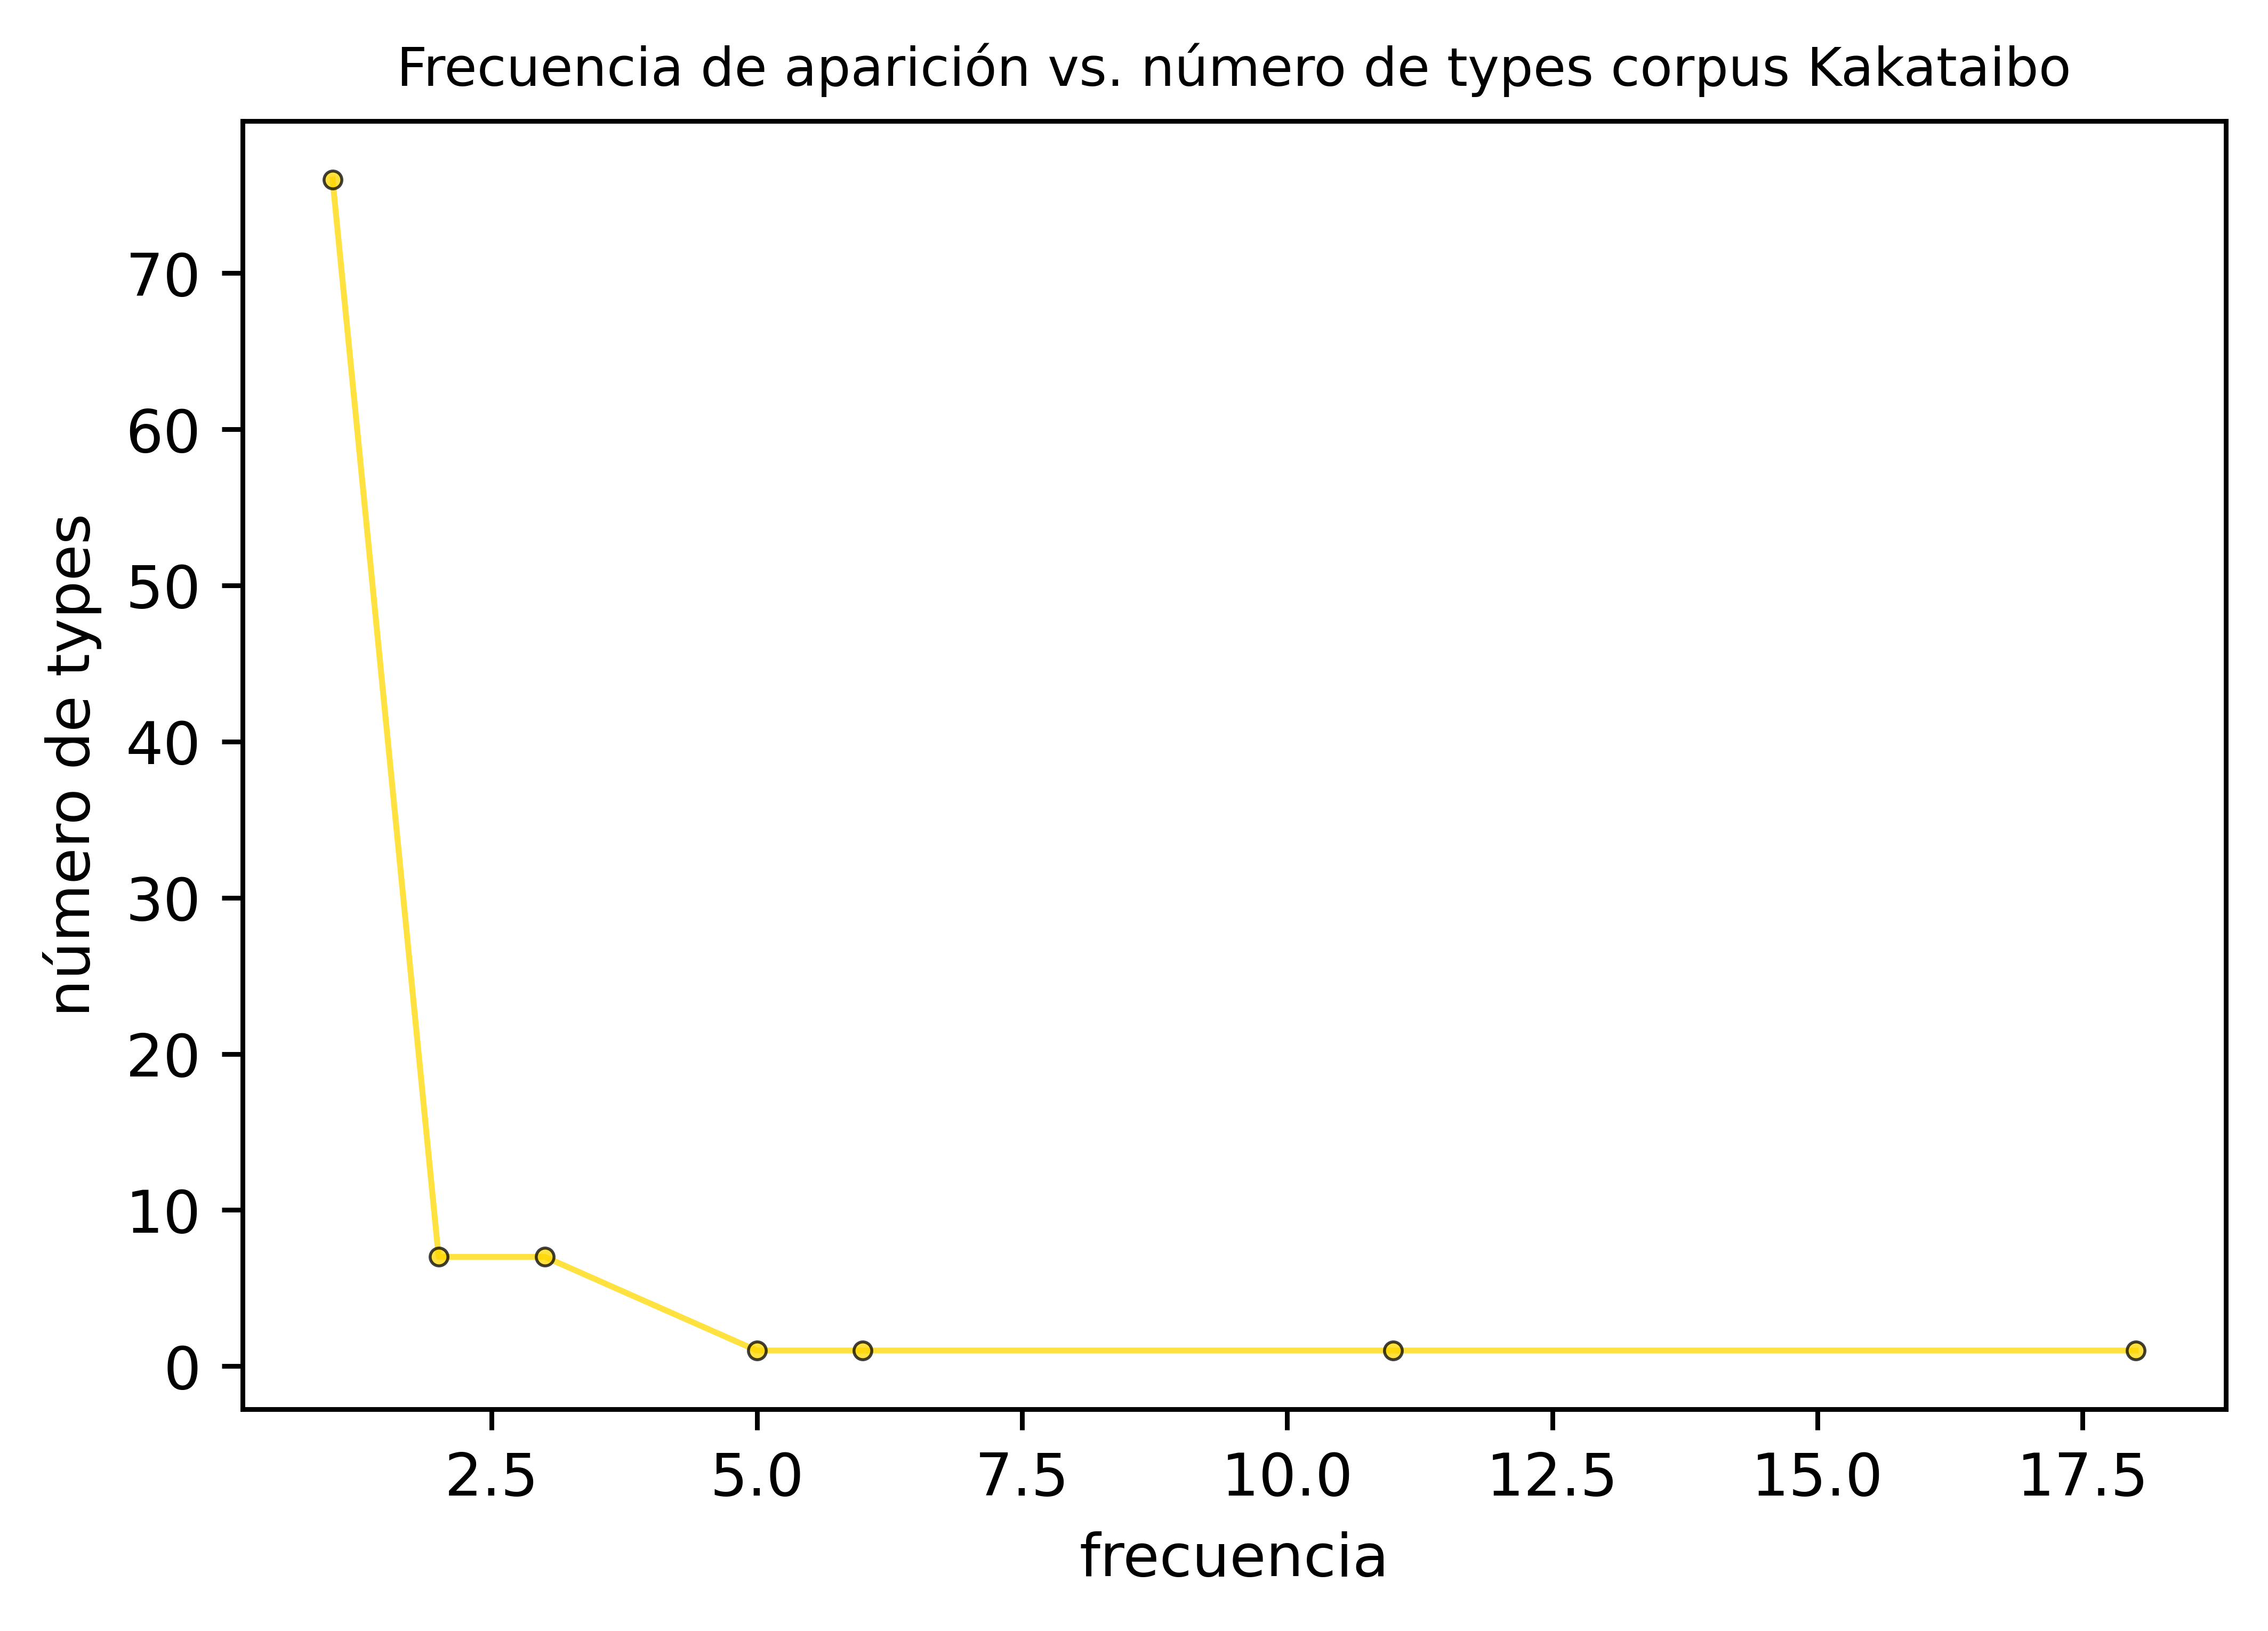

In [49]:
fig, ax = plt.subplots(dpi=800)

plt.title('Frecuencia de aparición vs. número de types corpus Kakataibo',fontsize=9)
ax.plot(X,Y,marker='o',color='gold',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.xlabel(r'frecuencia',fontsize=10)
plt.ylabel(r'número de types',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('frec_num.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

Suponga que el número de tokens es $n$. Si las palabras sucesivas están numeradas desde la palabra 1, luego 2, hasta la palabra $n$, la **distancia** entre dos palabras en posiciones $i$ y $j$ se define como $|i-j|$. 

Para una oración, calcule las distancias entre **cada token** y la **raiz (head)**. Identifique primero la posición de **head**. 

In [58]:
oracion = kakataibo[6]

In [59]:
oracion

TokenList<atian, casi, kamabi, nëtë, =n, ka, =is, =a, a, uni, kwan-akë-x-ín, .>

In [76]:
token = oracion[10]

In [77]:
token

{'id': 11,
 'form': 'kwan-akë-x-ín',
 'lemma': '_',
 'upos': 'VERB',
 'xpos': None,
 'feats': None,
 'head': 0,
 'deprel': 'root',
 'deps': None,
 'misc': {'go-rem.pst-3-prox': ''}}

In [70]:
def head_oracion(oracion):
    
    for token in oracion:
        if token['head']==0:
            head_id = token['id']
            
    return head_id

In [78]:
head_id = head_oracion(oracion)

In [79]:
distancias_head = []

for token in oracion:
    distancia = np.abs(token['id']-head_id)
    distancias_head+=[distancia]

In [80]:
distancias_head

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1]

In [85]:
import numpy as np

def distancias_head(oracion):
    
    head_id = head_oracion(oracion)
    distancias_head = []

    for token in oracion:
        distancia = np.abs(token['id']-head_id)
        distancias_head+=[distancia]
    return np.mean(distancias_head),np.max(distancias_head)

In [84]:
distancias_head(oracion)

(4.666666666666667, 10)

In [65]:
for token in oracion:
    print(token['form'],token['id'],token['head'])

atian 1 11
casi 2 3
kamabi 3 4
nëtë 4 11
=n 5 4
ka 6 11
=is 7 11
=a 8 11
a 9 10
uni 10 11
kwan-akë-x-ín 11 0
. 12 11


In [51]:
import numpy as np
largos = []

for d in kakataibo[0]:
    largos += [np.abs(d['id']-d['head'])]

In [52]:
np.mean(largos)

3.3076923076923075

Calcule el **largo de dependencias** **promedio**, **máximo** y **mínimo**. 

[Paper :)](liu-dependencies-2017.pdf)

[otro paper :)](W19-7911.pdf)

Desordene **aleatoriamente las dependencias de las oraciones.** Use

In [53]:
import random

A = [1,2,3]

A_random = random.sample(A,len(A))

In [104]:
A_random

[2, 1, 3]

Cree 100 versiones aleatorias de las dependencias de una oración. Guárdelas en una lista. 